In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import calendar

## DateTime

datetime模块定义了两个常量：分别表示datetime所能表示的最 小、最大年份

    datetime.MINYEAR = 1
    datetime.MAXYEAR = 9999

datetime模块定义了下面这几个类：

    datetime.date：      表示日期的类。常用的属性有year, month, day
    datetime.time：      表示时间的类。常用的属性有hour, minute, second, microsecond
    datetime.datetime：  表示日期时间。
    datetime.timedelta： 表示时间间隔，即两个时间点之间的长度。
    datetime.tzinfo：    与时区有关的相关信息。（参考python手册）


### date类

    date类表示一个日期

    class datetime.date(year, month, day)

    year的范围是[MINYEAR, MAXYEAR]，即[1, 9999]；
    month的范围是[1, 12] （月份是从1开始的，不是从0开始的~_~）；
    day的最大值根据给定的year, month参数来决定。例如闰年2月份有29天；

date类定义了一些常用的类方法与类属性，方便我们操作：

    date.max/min                   date对象所能表示的最大、最小日期；
    date.resolution：               date对象表示日期的最小单位。这里是天。
    date.today()：                  返回一个表示当前本地日期的date对象；
    date.fromtimestamp(timestamp)： 根据给定的时间戮，返回一个date对象；
    datetime.fromordinal(ordinal)： 将Gregorian日历时间转换为date对象

     

date提供的实例方法和属性：

    date.year/month/day：            年、月、日；
    date.replace(year, month, day): 生成一个新的日期对象，用参数指定的年，月，日代替原有对象中的属性。（原有对象仍保持不变）
    date.timetuple()：               返回日期对应的time.struct_time对象；
    date.toordinal()：               返回日期对应的Gregorian Calendar日期；
    date.weekday()：                 返回weekday，如果是星期一，返回0；如果是星期2，返回1，以此类推；
    data.isoweekday()：              返回weekday，如果是星期一，返回1；如果是星期2，返回2，以此类推；
    date.isocalendar()：             返回格式如(year, weekofyear, dayofweek)的元组； 
                                    注意，第二年的头几天可能属于前一年的week 53. 
    date.isoformat()：               返回格式如'YYYY-MM-DD’的字符串；
    date.strftime(fmt)：             自定义格式化字符串。
    
格式化字符见 https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

*另：Pandas 通常用于处理成组的日期，不管这些日期是DataFrame 的轴索引还是列索引，**to_datetime** 可以对格式进行转换。 很重要的一个特性是可以处理日期缺失*


date还对某些操作进行了重载，它允许我们对日期进行如下一些操作：

    date2 = date1 + timedelta  日期加上一个间隔，返回一个新的日期对象（timedelta将在下面介绍，表示时间间隔）
    date2 = date1 - timedelta  日期隔去间隔，返回一个新的日期对象
    timedelta = date1 - date2  两个日期相减，返回一个时间间隔对象
    date1 < date2              两个日期进行比较
    
    注： 对日期进行操作时，要防止日期超出它所能表示的范围。


In [47]:
now = datetime.now()
print("Now", now)
print("Now year", now.year)
print("week of day", now.isoweekday())
print("week of day", now.strftime("%A"))
print("week of day", calendar.day_name[now.weekday()])
year, weeknumber, weekday = now.isocalendar()
print(year, weeknumber, weekday)
print("week", now.strftime("%V"))

Now 2017-03-17 20:59:09.758621
Now year 2017
week of day 5
week of day Friday
week of day Friday
2017 11 5
week 11


In [48]:
now = datetime.now()
print(   '(%Y-%m-%d %H:%M:%S %f): ' , now.strftime( '%Y-%m-%d %H:%M:%S %f' ) )
print(   '(%Y-%m-%d %H:%M:%S %p): ' , now.strftime( '%y-%m-%d %I:%M:%S %p' ) )
print(   '%%a: %s '  % now.strftime( '%a' ) )
print(   '%%A: %s '  % now.strftime( '%A' ) )
print(   '%%b: %s '  % now.strftime( '%b' ) )
print(   '%%B: %s '  % now.strftime( '%B' ) )
print(   '日期时间%%c: %s '  % now.strftime( '%c' ) )
print(   '日期%%x：%s '  % now.strftime( '%x' ) )
print(   '时间%%X：%s '  % now.strftime( '%X' ) )
print(   '今天是这周的第%s天 '  % now.strftime( '%w' ))
print(   '今天是今年的第%s天 '  % now.strftime( '%j' ))
print(   '今周是今年的第%s周 '  % now.strftime( '%U' ))


(%Y-%m-%d %H:%M:%S %f):  2017-03-17 21:05:13 480959
(%Y-%m-%d %H:%M:%S %p):  17-03-17 09:05:13 PM
%a: Fri 
%A: Friday 
%b: Mar 
%B: March 
日期时间%c: Fri Mar 17 21:05:13 2017 
日期%x：03/17/17 
时间%X：21:05:13 
今天是这周的第5天 
今天是今年的第076天 
今周是今年的第11周 


In [53]:
print( 'datetime.max:', datetime.max )
print( 'datetime.min:', datetime.min )
print( 'datetime.resolution:', datetime.resolution )
print( 'today():', datetime.today() )
print( 'now():', datetime.now() )
print( 'utcnow():', datetime.utcnow() )
print( 'fromtimestamp(tmstmp):', datetime.fromtimestamp(time.time()))
print( 'utcfromtimestamp(tmstmp):', datetime.utcfromtimestamp(time.time()))

datetime.max: 9999-12-31 23:59:59.999999
datetime.min: 0001-01-01 00:00:00
datetime.resolution: 0:00:00.000001
today(): 2017-03-17 21:10:40.380361
now(): 2017-03-17 21:10:40.380907
utcnow(): 2017-03-17 13:10:40.381336
fromtimestamp(tmstmp): 2017-03-17 21:10:40.381624
utcfromtimestamp(tmstmp): 2017-03-17 13:10:40.381920


In [4]:
# datetime 转换成时间格式，比较方便，datetime, 本身有指定。
# 带格式转换更常用。'%Y-%m-%d'
stamp = datetime(2011, 1, 3)
print(stamp)    # 同 print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

# 字符串转时间，如果格式比较规整，则可以直接转。
value = '2013-1-1'
d = datetime.strptime(value, '%Y-%m-%d')
print("year", d.year, "day", d.day, "hour(??? default set)", d.hour)

# dateutil 更常用于字符串转时间
from dateutil.parser import parse
d = parse('2011-11-03'); print(d)
d = parse('Jan 31, 1997 10:45 PM'); print(d)
d = parse('6/12/2011', dayfirst=True); print(d)


2011-01-03 00:00:00
2011-01-03
year 2013 day 1 hour(??? default set) 0
2011-11-03 00:00:00
1997-01-31 22:45:00
2011-12-06 00:00:00


In [6]:
datestrs = ['7/6/2015', '8/12/2016']
idx = pd.to_datetime(datestrs)
print(type(idx))  # shall be DattimeIndex
print(idx)
idx = pd.to_datetime(datestrs+[None])
print(idx)   # there is NaT at tail
pd.isnull(idx)

<class 'pandas.tseries.index.DatetimeIndex'>
DatetimeIndex(['2015-07-06', '2016-08-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2015-07-06', '2016-08-12', 'NaT'], dtype='datetime64[ns]', freq=None)


array([False, False,  True], dtype=bool)

### Time类

time类表示时间，由时、分、秒以及微秒组成。

    class datetime.time(hour[ , minute[ , second[ , microsecond[ , tzinfo] ] ] ] ) ：
    这里留意一下参数tzinfo，它表示时区信息。
    注意一下各参数的取值范围：
    hour的范围为[0, 24)，
    minute的范围为[0, 60)，
    second的范围为[0, 60)，
    microsecond的范围为[0, 1000000)。

time类定义的类属性：

    time.min/max：    time类所能表示的最小、最大时间。
                     time.min = time(0, 0, 0, 0)
                     time.max = time(23, 59, 59, 999999)；
    time.resolution： 时间的最小单位，这里是1微秒；

    time类提供的实例方法和属性：

    time.hour/minute/second/microsecond：  时、分、秒、微秒；
    time.tzinfo：                          时区信息；
    time.replace([ hour[ , minute[ , second[ , microsecond[ , tzinfo] ] ] ] ] )：
                                          创建一个新的时间对象，用参数指定的时、分、秒、微秒代替原有对象中的属性（原有对象仍保持不变）；
    time.isoformat()：                     返回型如"HH:MM:SS"格式的字符串表示；
    time.strftime(fmt)：                   返回自定义格式化字符串。在下面详细介绍；


像date一样，也可以对两个time对象进行比较，或者相减返回一个时间间隔对象


### datetime类

datetime是date与time的结合体，包括date与time的所有信息。

    datetime.datetime (year, month, day[ , hour[ , minute[ , second[ , microsecond[ , tzinfo] ] ] ] ] )

datetime类定义的类属性与方法：

    datetime.min/max：                        datetime所能表示的最小值与最大值；
    datetime.resolution：                     datetime最小单位；
    datetime.today()：                        返回一个表示当前本地时间的datetime对象；
    datetime.now([tz])：                      返回一个表示当前本地时间的datetime对象，如果提供了参数tz，则获取tz参数所指时区的本地时间；
    datetime.utcnow()：                       返回一个当前utc时间的datetime对象；
    datetime.fromtimestamp(timestamp[, tz])： 根据时间戮创建一个datetime对象，参数tz指定时区信息；
    datetime.utcfromtimestamp(timestamp)：    根据时间戮创建一个datetime对象；
    datetime.combine(date, time)：            根据date和time，创建一个datetime对象；
    datetime.strptime(date_string, format)：  将格式字符串转换为datetime对象；


datetime类提供的实例方法与属性 （很多属性或方法在date和time中已经出现过，在此有类似的意义，这里只罗列这些方法名，）：

    datetime.year、month、day、hour、minute、second、microsecond、tzinfo：
    datetime.date()：
    datetime.time()：
    datetime.replace ([ year[ , month[ , day[ , hour[ , minute[ , second[ , microsecond[ , tzinfo] ] ] ] ] ] ] ])：
    datetime.timetuple ()
    datetime.utctimetuple ()
    datetime.toordinal ()
    datetime.weekday ()
    datetime.isocalendar ()
    datetime.isoformat ([ sep] )
    datetime.ctime ()：                 返回一个日期时间的C格式字符串，等效于time.ctime(time.mktime(dt.timetuple()))；
    datetime.strftime (format)

像date一样，也可以对两个datetime对象进行比较，或者相减返回一个时间间隔对象，或者日期时间加上一个间隔返回一个新的日期时间对象

格式字符串

datetime、date、time都提供了strftime()方法，该方法接收一个格式字符串，输出日期时间的字符串表示。

    格式字符  意义

    %a   星期的简写。如 星期三为Web
    %A   星期的全写。如 星期三为Wednesday
    %b   月份的简写。如4月份为Apr
    %B   月份的全写。如4月份为April 
    %c:  日期时间的字符串表示。（如： 04/07/10 10:43:39）
    %d:  日在这个月中的天数（是这个月的第几天）
    %f:  微秒（范围[0,999999]）
    %H:  小时（24小时制，[0, 23]）
    %I:  小时（12小时制，[0, 11]）
    %j:  日在年中的天数 [001,366]（是当年的第几天）
    %m:  月份（[01,12]）
    %M:  分钟（[00,59]）
    %p:  AM或者PM
    %S:  秒（范围为[00,61]，为什么不是[00, 59]，参考python手册~_~）
    %U:  周在当年的周数当年的第几周），星期天作为周的第一天
    %w:  今天在这周的天数，范围为[0, 6]，6表示星期天
    %W:  周在当年的周数（是当年的第几周），星期一作为周的第一天
    %x:  日期字符串（如：04/07/10）
    %X:  时间字符串（如：10:43:39）
    %y:  2个数字表示的年份
    %Y:  4个数字表示的年份
    %z:  与utc时间的间隔 （如果是本地时间，返回空字符串）
    %Z:  时区名称（如果是本地时间，返回空字符串）
    %%:  %% => %

### Time Series

In [44]:
# 构建一个以日期为索引的数据集。
dates = [datetime(2011, 1, 2), datetime(2011, 1,5), datetime(2011, 1, 7), datetime(2011, 1,8), datetime(2011, 1,10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index = dates)
print("ts content\n", ts, "\n")
print("Type of ts", type(ts))
print("Type of ts index", type(ts.index))

ts content
 2011-01-02    1.677894
2011-01-05   -3.176939
2011-01-07   -0.938694
2011-01-08   -0.368459
2011-01-10    0.776427
2011-01-12    0.615356
dtype: float64 

Type of ts <class 'pandas.core.series.Series'>
Type of ts index <class 'pandas.tseries.index.DatetimeIndex'>


In [45]:
# 日期补全
ts.resample('D').asfreq()

2011-01-02    1.677894
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -3.176939
2011-01-06         NaN
2011-01-07   -0.938694
2011-01-08   -0.368459
2011-01-09         NaN
2011-01-10    0.776427
2011-01-11         NaN
2011-01-12    0.615356
Freq: D, dtype: float64

In [13]:
# ts 的操作是按索引对齐的
print(ts[::2], "\n")
print(ts + ts[::2])  #由于ts[::2] 只有3列，则只有这3列进行了运算

2011-01-02    0.550696
2011-01-07   -1.227990
2011-01-10    1.024946
dtype: float64 

2011-01-02    1.101392
2011-01-05         NaN
2011-01-07   -2.455980
2011-01-08         NaN
2011-01-10    2.049892
2011-01-12         NaN
dtype: float64


In [16]:
stamp = ts.index[0]
print(stamp)
print(ts[stamp])
print(ts['2011/01/02'])
print(ts['20110102'])
print(ts[datetime(2011,1,7):])  #切片只对Series有效
print(ts['1/6/2011':'1/11/2011']) # 如果时间序列数据是按时间排列的，因此你可以用不存在于该时间序列中的时间戳对其进行切片（即查询范围）
print(ts.truncate(after = '1/9/2011'))

2011-01-02 00:00:00
0.550696228949
0.550696228949
0.550696228949
2011-01-07   -1.227990
2011-01-08    0.111248
2011-01-10    1.024946
2011-01-12    0.132325
dtype: float64
2011-01-07   -1.227990
2011-01-08    0.111248
2011-01-10    1.024946
dtype: float64
2011-01-02    0.550696
2011-01-05    1.941779
2011-01-07   -1.227990
2011-01-08    0.111248
dtype: float64


In [17]:
# 使用索引， 可以用'年', '年月‘直接对datetime index进行筛选
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts2001 = longer_ts['2001']
print(ts2001.head())
print(ts2001.tail())
ts_may = longer_ts['2001-05']
print(ts_may.head())
print(ts_may.tail())

2001-01-01   -0.530204
2001-01-02    0.550254
2001-01-03    0.027720
2001-01-04    0.492169
2001-01-05    0.263610
Freq: D, dtype: float64
2001-12-27   -1.142629
2001-12-28   -1.414808
2001-12-29   -0.855997
2001-12-30    1.157519
2001-12-31    2.311698
Freq: D, dtype: float64
2001-05-01    0.211688
2001-05-02   -0.954787
2001-05-03    1.188087
2001-05-04    0.680145
2001-05-05    1.124810
Freq: D, dtype: float64
2001-05-27    0.829648
2001-05-28   -1.266136
2001-05-29    0.387319
2001-05-30   -0.106521
2001-05-31    0.970130
Freq: D, dtype: float64


### Period 类
时期(Period)类表示的是时间区间，其构造函数需要用到一个时间的表达，和频率表达。 可以用+/-表达对时间的偏移。

    p = pd.Period('2007', freq='A-DEC') # 2007年整年
    p + 5                               # 2012年整年

** 使用Pandas方法，**
Pandas 中频率有一个基础频率和一个乘数组成，基础频率通常一个字符串表示，'M', 'H'.‘H’ 一个小时 '4H' 则是四个小时, '2h30min' 也可以被用于表达频率.'WOM-3FRI' 每月第三个星期五。 http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases


    period_range('1/1/2000','6/30/2000', freq='M')
                                  产生一个范围
    p.asfreq('M', how='start')    频率转换
    to_period:                    将Timestamp转换成频率，及其反向
    resample                      将时间序列从一个频率转换到另一个频率。 
                                  freq = 重采样的频率 DateOffset 如: 'M', '5min'或Second(15)
                                  how = 用于产生聚合值的函数名或数组函数，例如'mean','ohlc', np.max等，
                                        常用的有first, last, median, ohlc, max, min
                                  axis = 采样的轴，默认为0
                                  fill_method = 升采样时如何插值， ffill, bfill 默认不插值
                                  closed = 降采样中，各时间段的那一段是闭合的， 'right' or 'left'。
                                  


In [26]:
# 每周三，连续6周。
dates = pd.date_range('1/1/2000', periods=6, freq = 'W-WED')
long_df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['CityA', 'CityB', 'CityC', 'CityD'])
print(long_df)
print(long_df.ix['2-2000'])  # 只取二月的数据 
# 产生一个有每月最后一个工作日组成的时间索引,可以用'BM'频率 (Business end of Month)
print(pd.date_range('1/1/2000', '12/1/2000', freq='BM'))
# normalize 到午夜的时间戳
print(pd.date_range('5/2/2005 12:56:31', periods=5))
print(pd.date_range('5/2/2005 12:56:31', periods=5, normalize=True))

               CityA     CityB     CityC     CityD
2000-01-05 -1.145062  1.377813  2.239724  1.737490
2000-01-12 -2.847373 -1.604033  0.944706 -0.107888
2000-01-19  1.682714 -0.278113  1.343658  0.680478
2000-01-26  0.418800  2.584666  1.205193  2.030647
2000-02-02  0.948380 -1.841159  0.089230  2.893110
2000-02-09 -0.597015 -0.346863  1.206448  0.107208
               CityA     CityB     CityC     CityD
2000-02-02  0.948380 -1.841159  0.089230  2.893110
2000-02-09 -0.597015 -0.346863  1.206448  0.107208
DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')
DatetimeIndex(['2005-05-02 12:56:31', '2005-05-03 12:56:31',
               '2005-05-04 12:56:31', '2005-05-05 12:56:31',
               '2005-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2005-05-02', '20

** 在Time Series学习中，常常对时间系列数据作shift。**

In [37]:
ts = pd.Series(np.random.randn(4), index = pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print(ts.shift(2))  #注意，索引没变，但是数据往后移动
#print(ts.shift(-2))

2000-01-31   -0.914056
2000-02-29    0.154396
2000-03-31   -0.620854
2000-04-30    0.872858
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.914056
2000-04-30    0.154396
Freq: M, dtype: float64
2000-01-31   -0.620854
2000-02-29    0.872858
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64


In [40]:
# 如需对索引也作修改，则要提供频率信息
print(ts)
print(ts.shift(2, freq='M'))
print(ts.shift(1, freq='D'))

2000-01-31   -0.914056
2000-02-29    0.154396
2000-03-31   -0.620854
2000-04-30    0.872858
Freq: M, dtype: float64
2000-03-31   -0.914056
2000-04-30    0.154396
2000-05-31   -0.620854
2000-06-30    0.872858
Freq: M, dtype: float64
2000-02-01   -0.914056
2000-03-01    0.154396
2000-04-01   -0.620854
2000-05-01    0.872858
Freq: MS, dtype: float64


In [59]:
# 100天重采样（降采样），用平均值
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts.head())
print(ts.resample('M').mean())

2000-01-01   -0.071237
2000-01-02    0.473750
2000-01-03    1.155460
2000-01-04    0.309570
2000-01-05    0.005503
Freq: D, dtype: float64
2000-01-31    0.182995
2000-02-29    0.146524
2000-03-31    0.130098
2000-04-30   -0.663683
Freq: M, dtype: float64


In [69]:
# 产生12个1分钟数据
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
# 融合到5分钟的时间间隔中去。
print(ts.resample('5min', closed='left').sum())
print(ts.resample('5min', closed='right').sum())
print(ts.resample('5min', closed='right', label='right').sum())
print(ts.resample('5min').ohlc())

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64
1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64
2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64
                     open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5     9    5      9
2000-01-01 00:10:00    10    11   10     11


In [76]:
# 升采样填充值
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                    columns=['CityA', 'CityB','CityC','CityD'])

print(frame.tail())
df_daily = frame.resample('D')
print(df_daily.asfreq())
print(df_daily.ffill())
print(df_daily.ffill(limit=2))

               CityA     CityB     CityC     CityD
2000-01-05 -0.160833 -0.182340  1.203446  0.993686
2000-01-12 -0.150515 -0.792713  1.637042  0.110697
               CityA     CityB     CityC     CityD
2000-01-05 -0.160833 -0.182340  1.203446  0.993686
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.150515 -0.792713  1.637042  0.110697
               CityA     CityB     CityC     CityD
2000-01-05 -0.160833 -0.182340  1.203446  0.993686
2000-01-06 -0.160833 -0.182340  1.203446  0.993686
2000-01-07 -0.160833 -0.182340  1.203446  0.993686
2000-01-08 -0.160833 -0.182340  1.203446  0.993686
2000-01-09 -0.160833 -0.182340  1.203446  0.993686
2000-01-10 -0.160833 -0.182340  1.203446  0.993686
2000-01-11 -0.160833 -0.182340 

### 时间序列绘图


             AAA   BBB   CCC
2000-08-04  91.0  45.0  30.0
2000-08-07  36.0  76.0   8.0
2000-08-08  85.0  23.0  12.0
2000-08-09  40.0   4.0  37.0
2000-08-10  30.0  95.0  17.0


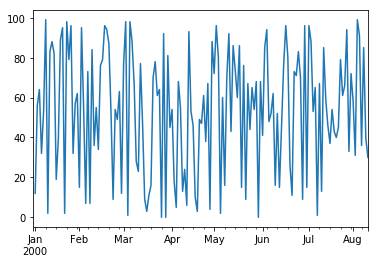

In [92]:
import matplotlib.pyplot as plt
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAA', 'BBB', 'CCC']]
close_px = close_px.resample('B').ffill()
print(close_px.tail())
close_px['AAA'].plot()
plt.show()